# Project: Investigate a Dataset - [TMDB dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 
>
### TMDB 

>


## Questions for Analysis
>*  what is the most popular genres?
>*  what is the genre that make profits ?
>*  what are the names of the movies that take top ratings ?
>*  what are the names of the movies gained most profit ?
>*  What is the most  coommon runtime of movies?

In [29]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as pt
#import plotly.express as pex
import seaborn as sns
import csv
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\dell\anaconda3\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\Dell\anaconda3\Lib\site-packages\~andas-1.4.2.dist-info
  Moving to c:\users\dell\anaconda3\lib\site-packages\pandas\
   from C:\Users\Dell\anaconda3\Lib\site-packages\~andas


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Dell\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-n2nmhuyw\\pandas_98dd6734cbda40989af9eac4a8610c05\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-n2nmhuyw\\pandas_98dd6734cbda40989af9eac4a8610c05\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Dell\AppData\Local\Temp\pip-wheel-u9x985y2'
       cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-n2nmhuyw\pandas_98dd6734cbda40989af9eac4a8610c05\
  Complete output (909 lines):
  C:\Users\Dell\AppData\Local\Temp\pip-install-n2nmhuyw\pandas_98dd6734cbda40989af9eac4a8610c05\setup.py:53: DeprecationW

    [13/38] Cythonizing pandas\_libs/parsers.pyx
    [14/38] Cythonizing pandas\_libs/properties.pyx
    [15/38] Cythonizing pandas\_libs/reduction.pyx
    [16/38] Cythonizing pandas\_libs/reshape.pyx
    [17/38] Cythonizing pandas\_libs/skiplist.pyx
    [18/38] Cythonizing pandas\_libs/sparse.pyx
    [19/38] Cythonizing pandas\_libs/testing.pyx
    [20/38] Cythonizing pandas\_libs/tslib.pyx
    [21/38] Cythonizing pandas\_libs/tslibs/c_timestamp.pyx
    [22/38] Cythonizing pandas\_libs/tslibs/ccalendar.pyx
    [23/38] Cythonizing pandas\_libs/tslibs/conversion.pyx
    [24/38] Cythonizing pandas\_libs/tslibs/fields.pyx
    [25/38] Cythonizing pandas\_libs/tslibs/frequencies.pyx
    [26/38] Cythonizing pandas\_libs/tslibs/nattype.pyx
    [27/38] Cythonizing pandas\_libs/tslibs/np_datetime.pyx
    [28/38] Cythonizing pandas\_libs/tslibs/offsets.pyx
    [29/38] Cythonizing pandas\_libs/tslibs/parsing.pyx
    [30/38] Cythonizing pandas\_libs/tslibs/period.pyx
    [31/38] Cythonizing pandas

<a id='wrangling'></a>
## Data Wrangling



In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
dftmdb=pd.read_csv("tmdb-movies.csv")
#add gained row to express profits
dftmdb.insert(5,"gained",dftmdb["revenue"]-dftmdb["budget"])
dftmdb.head()


,id,imdb_id,popularity,budget,revenue,gained,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [31]:
#to know the shape of data
str(dftmdb.shape[0])+" rows  &  " + str(dftmdb.shape[1])+" columns"

'10866 rows  &  22 columns'


## Data Cleaning
 

### create new data frame with important rows

In [32]:
moviedf=dftmdb[["popularity","budget","revenue","gained","release_date","runtime","original_title","vote_average"]].copy()
moviedf.head()

,popularity,budget,revenue,gained,release_date,runtime,original_title,vote_average
0,32.985763,150000000,1513528810,1363528810,6/9/15,124,Jurassic World,6.5
1,28.419936,150000000,378436354,228436354,5/13/15,120,Mad Max: Fury Road,7.1
2,13.112507,110000000,295238201,185238201,3/18/15,119,Insurgent,6.3
3,11.173104,200000000,2068178225,1868178225,12/15/15,136,Star Wars: The Force Awakens,7.5
4,9.335014,190000000,1506249360,1316249360,4/1/15,137,Furious 7,7.3


In [33]:
#to know data shape
str(moviedf.shape[0])+" rows  &  " + str(moviedf.shape[1])+" columns"

'10866 rows  &  8 columns'

In [34]:
#check for missing values
moviedf.isnull().any()

popularity        False
budget            False
revenue           False
gained            False
release_date      False
runtime           False
original_title    False
vote_average      False
dtype: bool

In [35]:
#drop duplicates
moviedf.drop_duplicates(inplace= True)

In [36]:
sum(moviedf.duplicated())

0

In [37]:
#change date row
moviedf.release_date = pd.to_datetime(moviedf['release_date'])

In [38]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   gained          10865 non-null  int64         
 4   release_date    10865 non-null  datetime64[ns]
 5   runtime         10865 non-null  int64         
 6   original_title  10865 non-null  object        
 7   vote_average    10865 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 763.9+ KB


In [39]:
moviedf.head()

,popularity,budget,revenue,gained,release_date,runtime,original_title,vote_average
0,32.985763,150000000,1513528810,1363528810,2015-06-09,124,Jurassic World,6.5
1,28.419936,150000000,378436354,228436354,2015-05-13,120,Mad Max: Fury Road,7.1
2,13.112507,110000000,295238201,185238201,2015-03-18,119,Insurgent,6.3
3,11.173104,200000000,2068178225,1868178225,2015-12-15,136,Star Wars: The Force Awakens,7.5
4,9.335014,190000000,1506249360,1316249360,2015-04-01,137,Furious 7,7.3


<a id='eda'></a>
# Exploratory Data Analysis

>
>



# question 1
## Top 5 genres movies

In [40]:
#top 5 genres according to vote count
top5genres1=dftmdb.nlargest(5,"vote_count")
def barplot(arg1 , arg2):
    
    pt.style.use('seaborn')
    pt.figure(figsize=(20,8))
    sns.barplot(x="genres" , y=arg1, data=top5genres1)
    pt.title(arg2, fontsize = 20)
    pt.show()


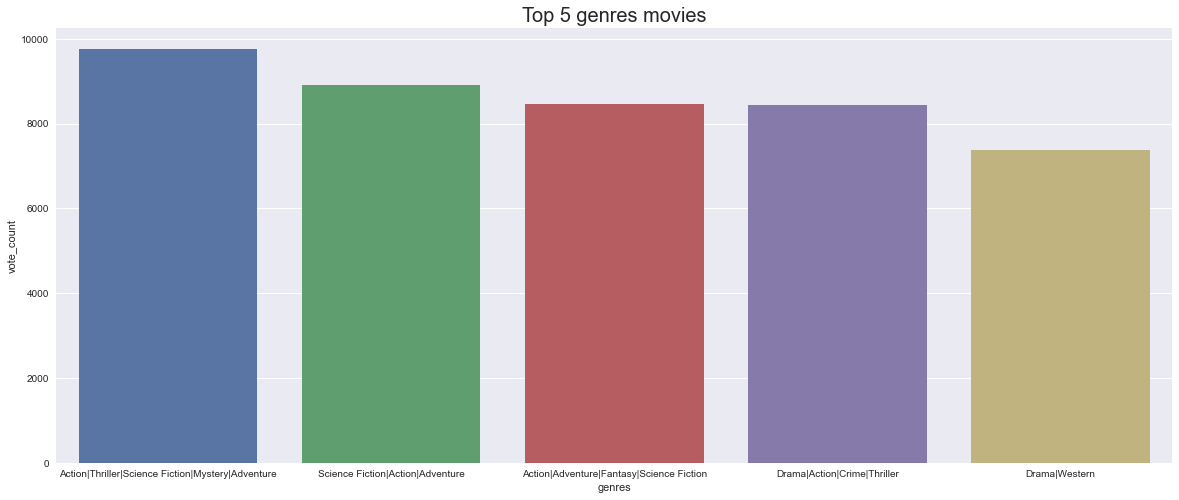

In [41]:
barplot("vote_count",'Top 5 genres movies')

### it's appear that the action movies is the most genre prefered by viewers

# Question two 
## Top genres earn profit

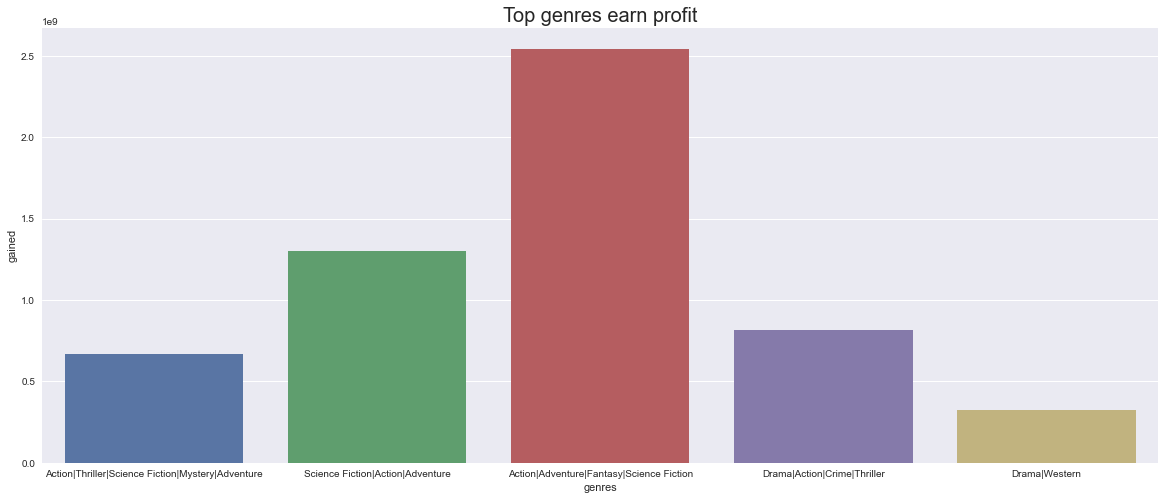

In [42]:
#top 5 genres according to gained profit
barplot("gained","Top genres earn profit" )

### it's appear that the action movies makes more profits than other movies

# Question 3
## The top 10 voted movies

In [43]:
moviedf.nlargest(10,"vote_average")

,popularity,budget,revenue,gained,release_date,runtime,original_title,vote_average
3894,0.006925,0,0,0,2011-09-03,900,The Story of Film: An Odyssey,9.2
538,0.114264,0,0,0,2015-01-01,88,The Mask You Live In,8.9
1200,0.129531,0,0,0,2014-12-16,74,Black Mirror: White Christmas,8.8
2269,0.222293,0,0,0,2010-10-02,47,Life Cycles,8.8
6911,0.212010,0,0,0,2006-07-09,145,Pink Floyd: Pulse,8.7
2401,0.067753,0,0,0,2010-09-21,163,Opeth: In Live Concert At The Royal Albert Hall,8.6
3224,0.224721,0,0,0,2008-07-01,164,John Mayer: Where the Light Is Live in Los Ang...,8.5
3690,0.321341,0,0,0,2011-09-08,80,The Art of Flight,8.5
5830,0.248944,0,0,0,2013-12-25,60,Doctor Who: The Time of the Doctor,8.5
8221,0.194889,0,0,0,1995-05-21,225,A Personal Journey with Martin Scorsese Throug...,8.5


In [22]:
top10voted=moviedf.nlargest(10,"vote_average")
top10voted["original_title"]

3894                        The Story of Film: An Odyssey
538                                  The Mask You Live In
1200                        Black Mirror: White Christmas
2269                                          Life Cycles
6911                                    Pink Floyd: Pulse
2401      Opeth: In Live Concert At The Royal Albert Hall
3224    John Mayer: Where the Light Is Live in Los Ang...
3690                                    The Art of Flight
5830                   Doctor Who: The Time of the Doctor
8221    A Personal Journey with Martin Scorsese Throug...
Name: original_title, dtype: object

#### These are the names of the top rated movies

# Question 4
## Top 10 movies gained profit

In [44]:
#the highest profit gained movies
moviedf.nlargest(10,"gained")

,popularity,budget,revenue,gained,release_date,runtime,original_title,vote_average
1386,9.432768,237000000,2781505847,2544505847,2009-12-10,162,Avatar,7.1
3,11.173104,200000000,2068178225,1868178225,2015-12-15,136,Star Wars: The Force Awakens,7.5
5231,4.355219,200000000,1845034188,1645034188,1997-11-18,194,Titanic,7.3
0,32.985763,150000000,1513528810,1363528810,2015-06-09,124,Jurassic World,6.5
4,9.335014,190000000,1506249360,1316249360,2015-04-01,137,Furious 7,7.3
4361,7.637767,220000000,1519557910,1299557910,2012-04-25,143,The Avengers,7.3
3374,5.711315,125000000,1327817822,1202817822,2011-07-07,130,Harry Potter and the Deathly Hallows: Part 2,7.7
14,5.944927,280000000,1405035767,1125035767,2015-04-22,141,Avengers: Age of Ultron,7.4
5422,6.112766,150000000,1274219009,1124219009,2013-11-27,102,Frozen,7.5
8094,1.136610,22000000,1106279658,1084279658,1995-07-28,114,The Net,5.6


In [24]:
top10gained=moviedf.nlargest(10,"gained")
top10gained["original_title"]

1386                                          Avatar
3                       Star Wars: The Force Awakens
5231                                         Titanic
0                                     Jurassic World
4                                          Furious 7
4361                                    The Avengers
3374    Harry Potter and the Deathly Hallows: Part 2
14                           Avengers: Age of Ultron
5422                                          Frozen
8094                                         The Net
Name: original_title, dtype: object

#### These are the names of the top movies gained profits

# Question 5
## the most common runtime of movies

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

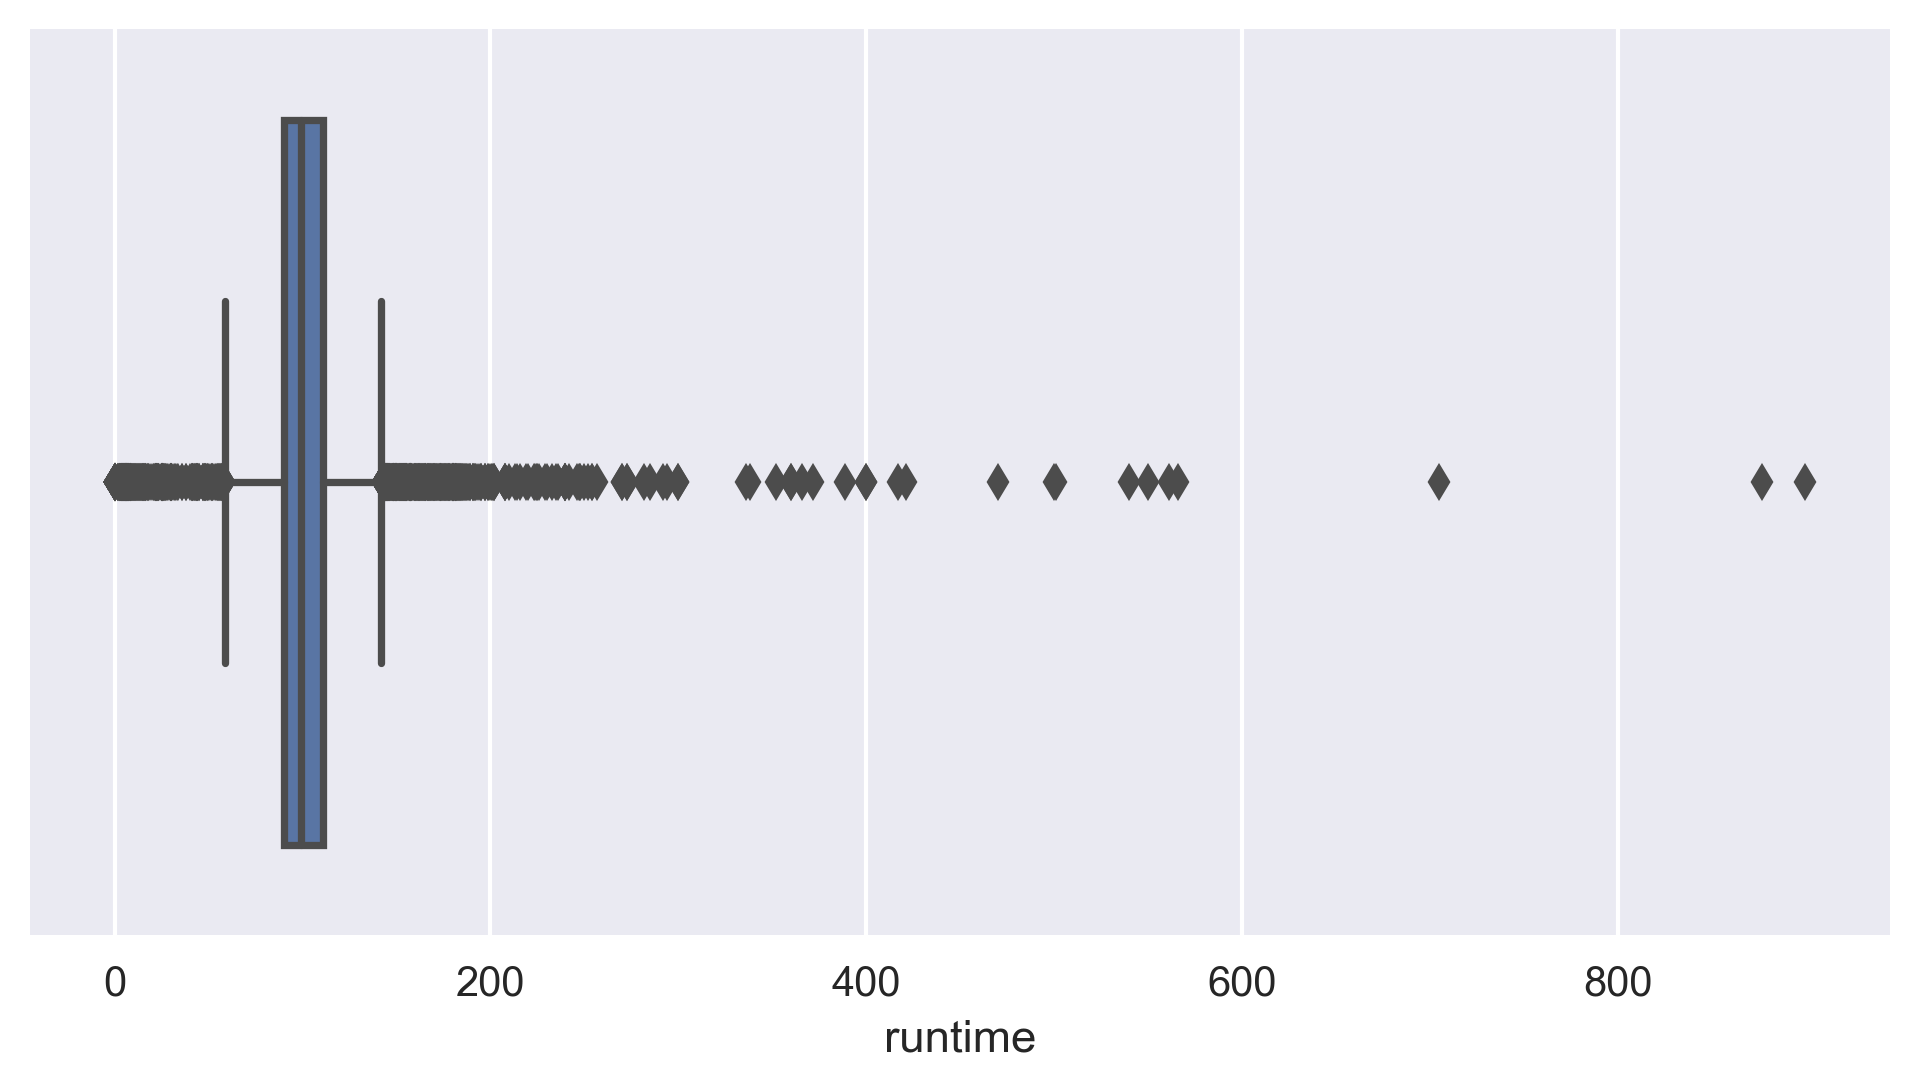

In [45]:
'''
pt.figure(figsize=(8,4), dpi = 200)
pt.xlabel('Top 5 genres movies', fontsize = 12)
pt.ylabel('Count of movies in the Dataset', fontsize=12)
pt.title('Runtime of all movies in the set', fontsize=13)
pt.hist(moviedf['runtime'], rwidth = 0.9, bins =35)
pt.show()
'''
pt.figure(figsize=(8,4), dpi = 300)
sns.boxplot(moviedf['runtime'])

In [26]:
moviedf['runtime'].mean()

102.07179015186378

### .

### .

<a id='conclusions'></a>
# Conclusions
**results :**
<ol>
<li> Action genres is the most voted </li>
<li> Action is the most genre return profit</li>
<li> the top rated movie is The Story of Film: An Odyssey</li>
<li> Avatar is the most movie gained profit</li>    
<li> 100 min is the most common runtimme of movies    
</ol> 

**limitations**
<ol>there are missing values that can affect on the analysis as the budget and revenue for some movies


In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1